In [195]:
import duckdb 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

In [196]:
# Avataan tietokanta ja valitaan oikea datasetti
def read_node(tbl: str, node_name: str):
    con = duckdb.connect(database=file)
    df = con.sql(f"SELECT * FROM {tbl} WHERE node_id = {node_name}").df()
    con.close()
    return df  

file = "data/duckdb.database"
tbl = "Silver_SensorData"
node = "3200"
df = read_node(tbl, node)

# Pienennetään dataa siten, että otetaan kuvan ulkopuolella olevat datapisteet pois
df_lim = df
df_lim = df_lim[(df_lim['x'] >= 305)]
df_lim = df_lim[(df_lim['x'] <= 1250)]
df_lim = df_lim[(df_lim['y'] <= 560)]
df_lim


,node_id,timestamp,x,y
13624,3200,2019-03-15 17:56:35.686716,1243,263
13625,3200,2019-03-15 17:56:35.686721,1243,263
13626,3200,2019-03-15 17:56:36.686693,1171,258
13627,3200,2019-03-15 17:56:36.686697,1171,258
13628,3200,2019-03-15 17:56:37.687728,1094,307
...,...,...,...,...
1082367,3200,2020-01-20 20:24:41.470940,587,341
1082368,3200,2020-01-20 20:24:42.471130,565,363
1082369,3200,2020-01-20 20:24:43.471330,544,405
1082370,3200,2020-01-20 20:24:44.470883,532,453


In [197]:
# Avataan ja sovitetaan kuva
img = plt.imread('kauppa.jpg')
img_height, img_width, _ = img.shape

## Ensin kokeilin piirtää pisteet karttaan, jotta voin pisteiden avulla luoda heatmapin

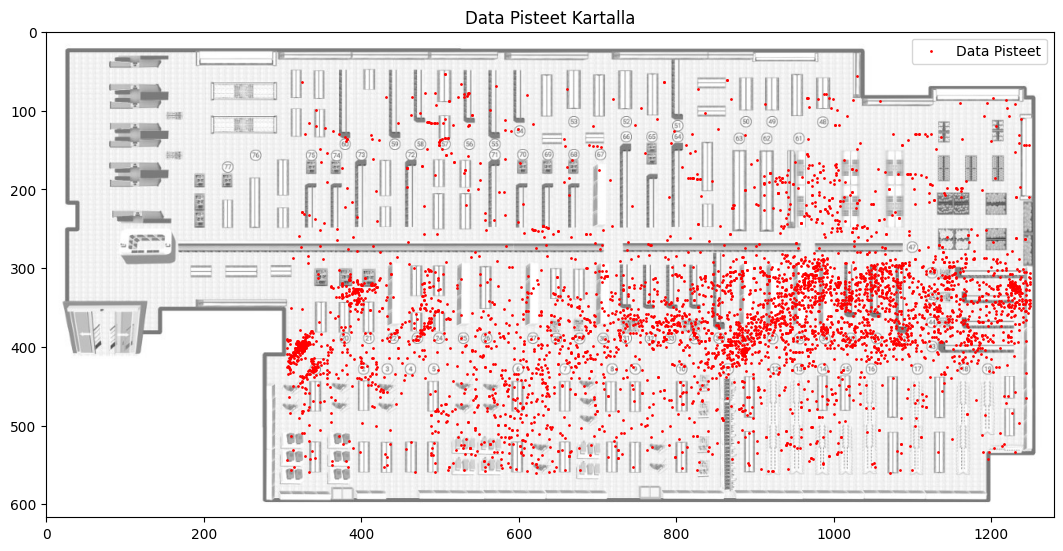

In [198]:
# Kuvan koko
fig, ax = plt.subplots(figsize=(13, 13))

# Näytetään kuva
ax.imshow(img)

# Lisätään datapisteet
ax.scatter(df_lim["x"], df_lim["y"], color="red", label="Data Pisteet", s=1)

# Otsikon asettaminen
ax.set_title("Data Pisteet Kartalla")

# Legendan näyttäminen
ax.legend()
plt.show()

## Tätä muokataan vielä

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/1432785346.py:5: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=df_lim, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/1432785346.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=df_lim, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


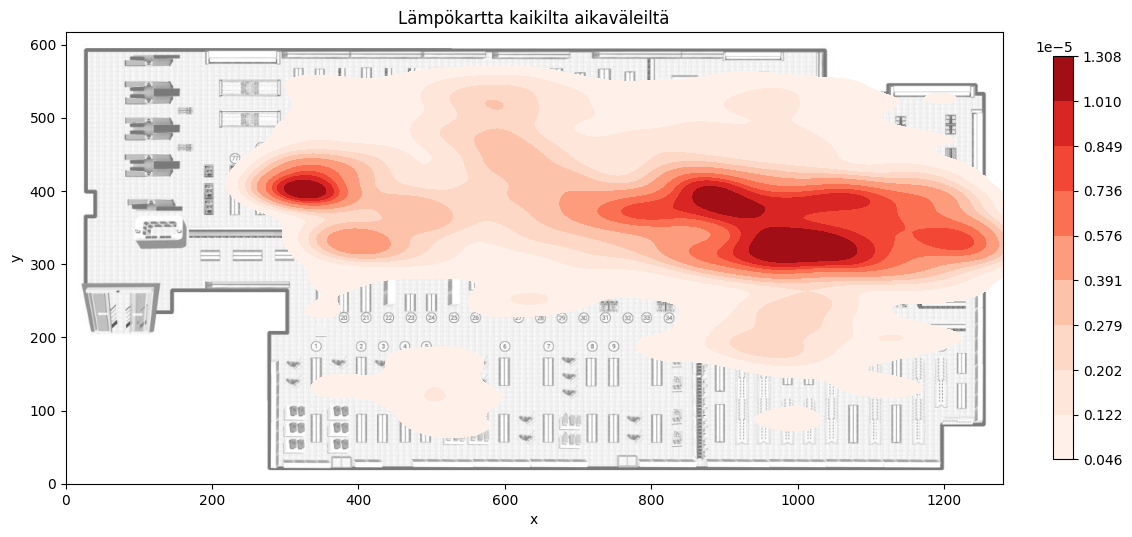

In [199]:
# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=df_lim, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta ja lisätään lämpöä osoittava pylväs
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title("Lämpökartta kaikilta aikaväleiltä")
plt.show()

## Piirretään nyt lämpökartat eri aikaväleille: 9.00-11.00; 11.00-13.00; 13.00-15.00; 15.00-17.00; 17.00-19.00; 19.00-21.00 (Pitää vielä muokata läpinäkyvyyttä esim)

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/864485458.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/864485458.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


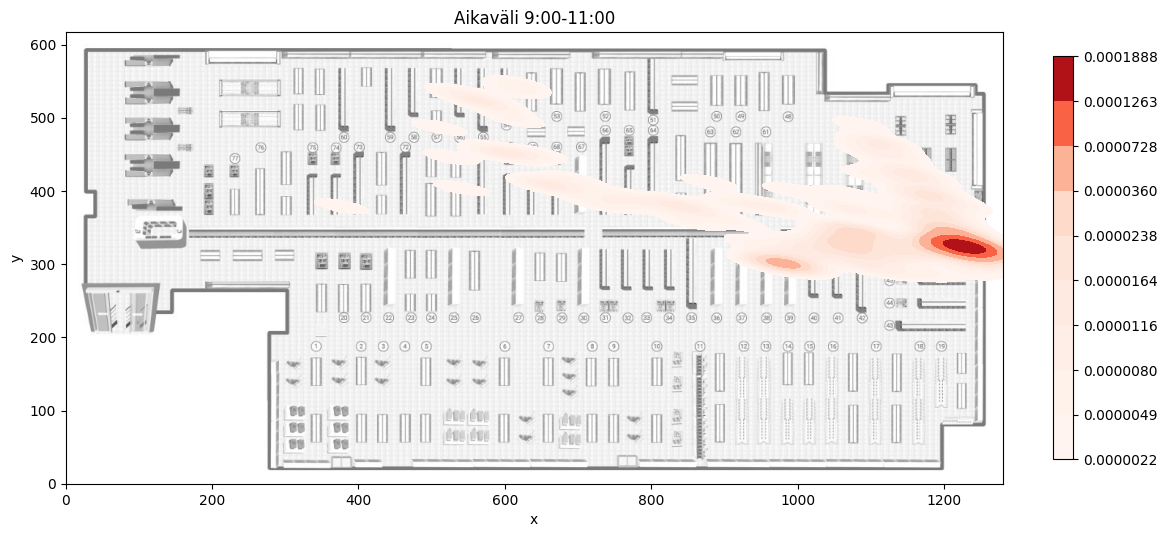

In [200]:
# Valittu aikaväli
start_hour = 9
end_hour = 11

# Rajataan vain väli 9:00-11:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/709943577.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/709943577.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


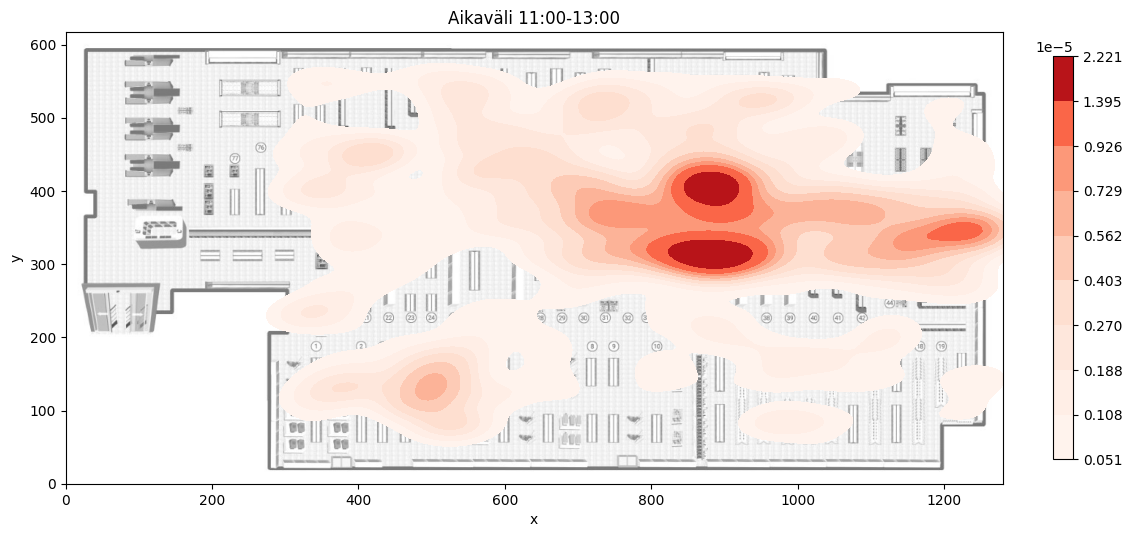

In [201]:
# Valittu aikaväli
start_hour = 11
end_hour = 13

# Rajataan vain väli 11:00-13:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/4027890257.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/4027890257.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


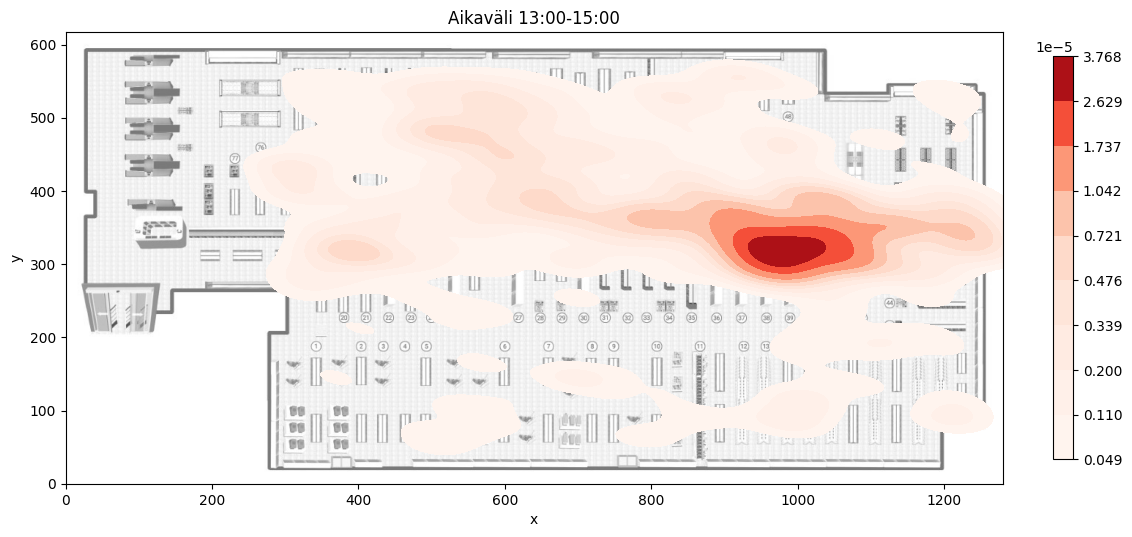

In [202]:
# Aikaväli
start_hour = 13
end_hour = 15

# Rajataan vain väli 13:00-15:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/1889894080.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/1889894080.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


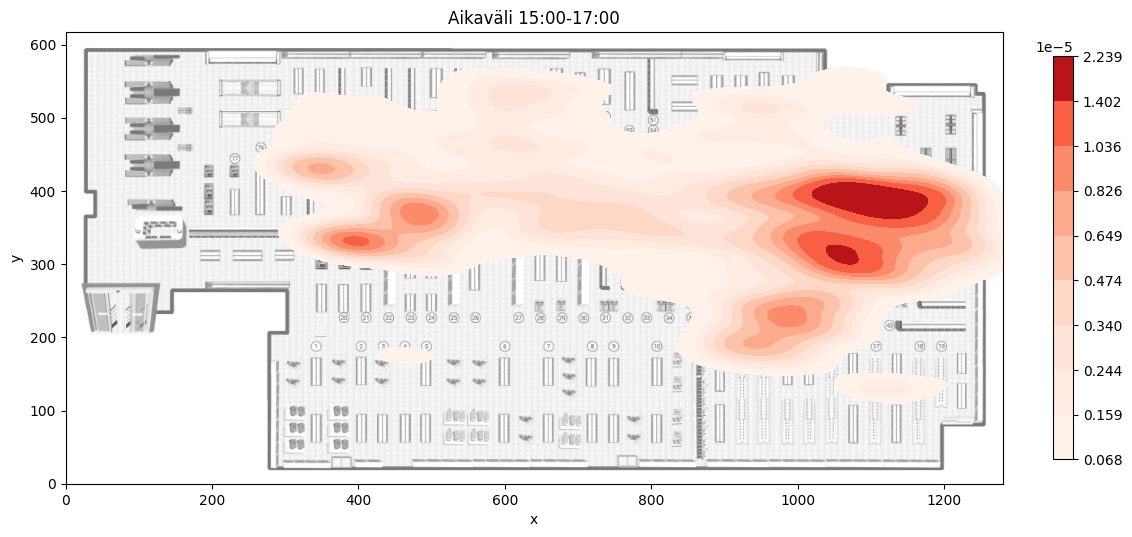

In [203]:
# Aikaväli 
start_hour = 15
end_hour = 17

# Rajataan vain väli 15:00-17:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/2877652654.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/2877652654.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


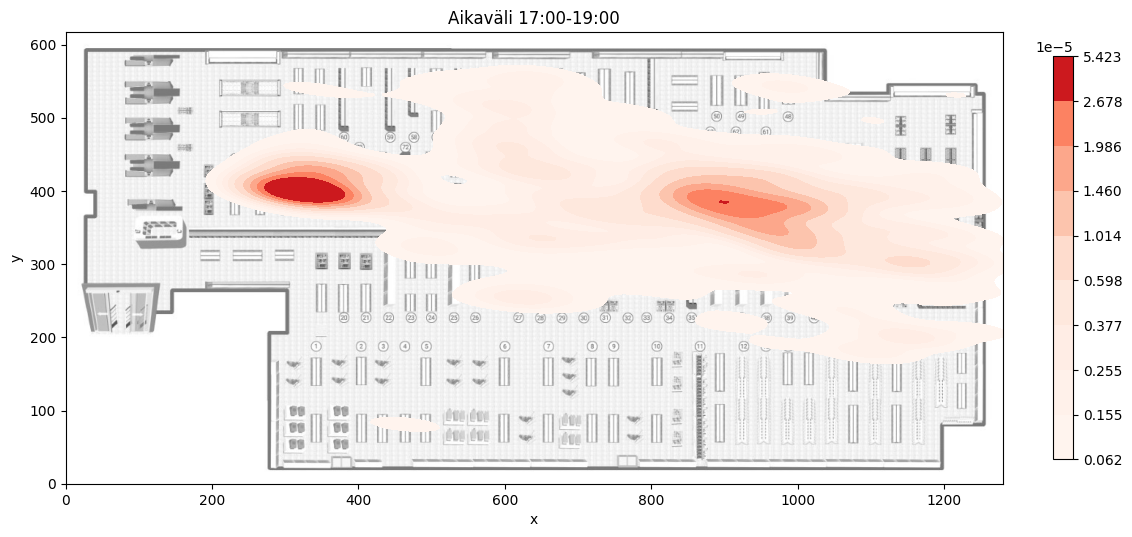

In [204]:
# Aikaväli
start_hour = 17
end_hour = 19

# Rajataan vain väli 17:00-19:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/3786460286.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/3786460286.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


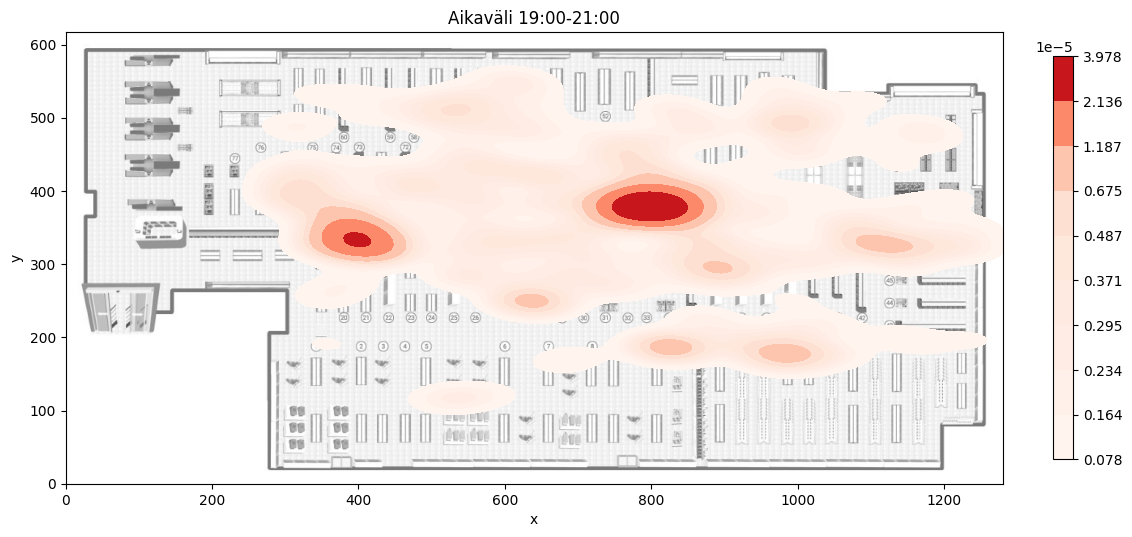

In [205]:
# Aikaväli
start_hour = 19
end_hour = 21

# Rajataan vain väli 19:00-21:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))
plt.show()